# Calculations to design the questionnaire

In [1]:
import numpy as np
from scipy import stats
from scipy import special
import matplotlib.pyplot as plt
import math

### Geometry

In [36]:
total_height = 9
crest_legth = 4
slope = 3
angle_slope = math.atan(1/3)
slope_length = 9/math.sin(angle_slope)
dike_base_slope = total_height/math.tan(angle_slope)
total_base = crest_legth + 2*dike_base_slope
print("Total base width: ", total_base)

Total base width:  57.99999999999999


### Dupuit parabola - Darcy approx solution

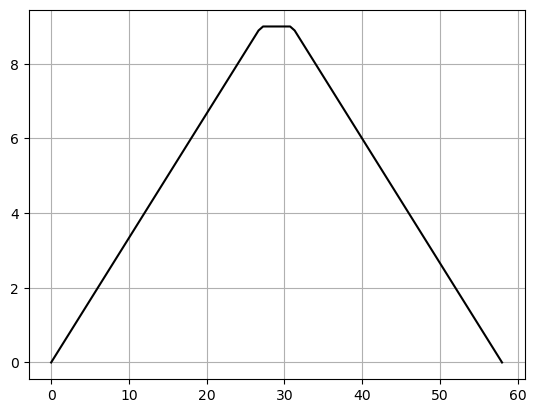

In [37]:
# more precise dike profile

length_arrays = 101
coord_x = np.linspace(0, total_base, length_arrays)

coord_y_dike = np.empty(length_arrays)
for i in range(length_arrays):
    if coord_x[i] < dike_base_slope:
        coord_y_dike[i] = coord_x[i]/slope
    elif coord_x[i] >= dike_base_slope and coord_x[i] <= (dike_base_slope + crest_legth):
        coord_y_dike[i] = total_height
    else:
        coord_y_dike[i] = -(coord_x[i] - (dike_base_slope + crest_legth))/slope + total_height

plt.plot(coord_x, coord_y_dike, color='black')
plt.grid()

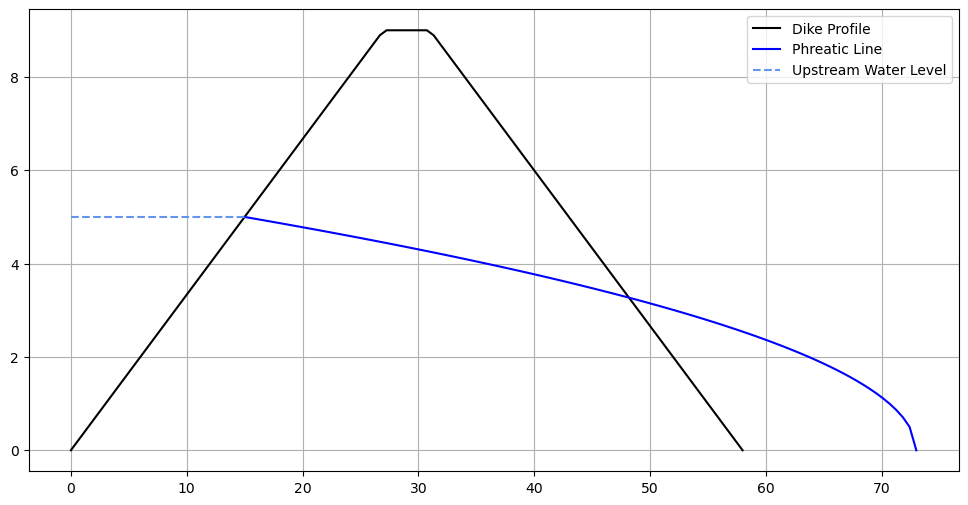

In [38]:
hydraulic_head_up = 5
hydraulic_head_down = 0

# look for the intersection between the water level and the slope
x_entrance_water = slope * hydraulic_head_up

# phreatic levels
phreatic_levels = np.sqrt(hydraulic_head_up**2 - (hydraulic_head_up**2 - hydraulic_head_down**2) * ((coord_x) / total_base))

fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(coord_x, coord_y_dike, color='black', label='Dike Profile')
ax.plot(coord_x + x_entrance_water, phreatic_levels, color='blue', label='Phreatic Line')
ax.plot([0, 15], [hydraulic_head_up, hydraulic_head_up], color='cornflowerblue', linestyle='--', label='Upstream Water Level')
ax.grid()
ax.legend()

array([ 0.  ,  0.58,  1.16,  1.74,  2.32,  2.9 ,  3.48,  4.06,  4.64,
        5.22,  5.8 ,  6.38,  6.96,  7.54,  8.12,  8.7 ,  9.28,  9.86,
       10.44, 11.02, 11.6 , 12.18, 12.76, 13.34, 13.92, 14.5 , 15.08,
       15.66, 16.24, 16.82, 17.4 , 17.98, 18.56, 19.14, 19.72, 20.3 ,
       20.88, 21.46, 22.04, 22.62, 23.2 , 23.78, 24.36, 24.94, 25.52,
       26.1 , 26.68, 27.26, 27.84, 28.42, 29.  , 29.58, 30.16, 30.74,
       31.32, 31.9 , 32.48, 33.06, 33.64, 34.22, 34.8 , 35.38, 35.96,
       36.54, 37.12, 37.7 , 38.28, 38.86, 39.44, 40.02, 40.6 , 41.18,
       41.76, 42.34, 42.92, 43.5 , 44.08, 44.66, 45.24, 45.82, 46.4 ,
       46.98, 47.56, 48.14, 48.72, 49.3 , 49.88, 50.46, 51.04, 51.62,
       52.2 , 52.78, 53.36, 53.94, 54.52, 55.1 , 55.68, 56.26, 56.84,
       57.42, 58.  ])

Crossing point (x, y):  48.13999999999999 3.2787192621510006


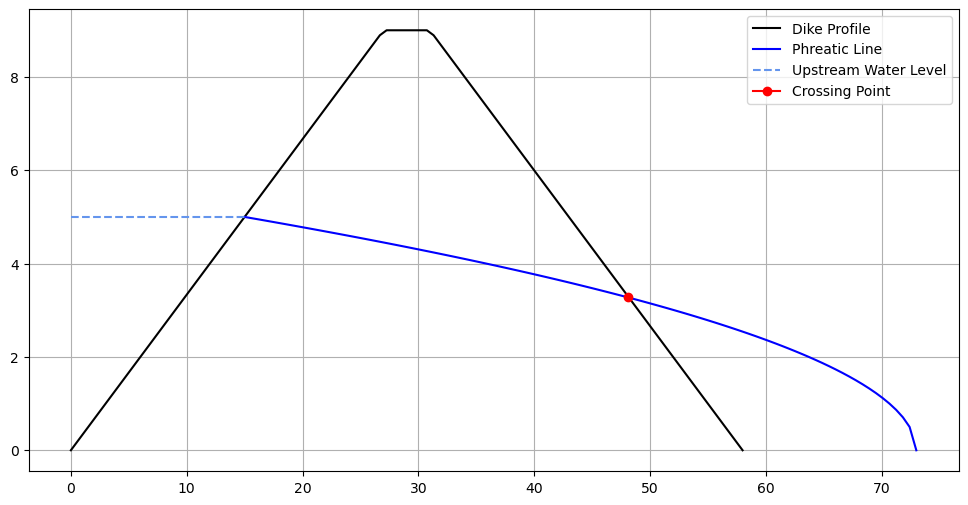

In [51]:
# Find crossing point between phreatic line and dike profile downstream

indices = np.where(coord_x > x_entrance_water)[0]
if indices.size > 0:
    first_index = indices[0]
    # print(first_index, coord_x[first_index]) 
else:
    print("No element greater than threshold.")


for i in range(first_index, length_arrays):
    if coord_y_dike[i] > phreatic_levels[i-first_index]:
        crossing_point_x = coord_x[i]
        crossing_point_y = phreatic_levels[i-first_index]
print("Crossing point (x, y): ", crossing_point_x, crossing_point_y)

fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(coord_x, coord_y_dike, color='black', label='Dike Profile')
ax.plot(coord_x + x_entrance_water, phreatic_levels, color='blue', label='Phreatic Line')
ax.plot([0, 15], [hydraulic_head_up, hydraulic_head_up], color='cornflowerblue', linestyle='--', label='Upstream Water Level')
ax.grid()
ax.legend()
ax.plot(crossing_point_x, crossing_point_y, marker='o', color='red', label='Crossing Point')
ax.legend()

End of notebook.